In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', 100)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [4]:
tf.__version__

'2.15.0'

* **Delay from due date**:  How many days a customer paid later than due date

* **Number of delayed payment** : How many times a customer paid later than due date

* **Number of Credit Inquiries**: A request for credit report information from a credit bureau. Credit inquiries are typically made by financial institutions to help them determine whether to approve you for credit. But credit inquiries can be made for many other reason as well, such as if you want to check your own credit. The two main types of credit inquiries are a hard inquiries and soft inquiries.

* **Credit utilization ratio**:  A measure of how much you owe on all your revolving accounts, such as credit cards, compared to your total available credit, expressed as a **percentage**. It is one of the biggest factors in your credit score and is calculated by dividing the sum of all your balances by the sum of your cards' credit limits. People with the best credit scores often have a credit utilization number in the single digits. Having 100% credit utilization means that you have used all your available credit.

* **Credit History Age**:The age of your credit history, or how long you’ve been using credit, generally accounts for 15% of your total credit scores. That means that, with time, your average credit score could go up because of a longer account history.

* **Payment of Min Amount**: Refers to the minimum payment required on a financial account, such as credit card or loan, to meet the obligations set by the lender or creditor.
* **Amount invested monthly** :Represents the total sum of money or assets that an individual or entity puts into investments on a monthly basis. It reflects the commitment to building wealth or achieving financial goals through regular investments.
* **Monthly Balance**:Indicates the remaining amount of money or funds in an account at the end of each month after considering all transactions, withdrawals, and deposits. It provides an overview of the account's financial status at a specific point in time.
* **Credit Score** : A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual. Lenders, such as banks and credit card companies, use credit scores to evaluate the potential risk posed by lending money to consumers and to mitigate losses due to bad debt. Lenders use credit scores to determine who qualifies for a loan, at what interest rate, and what credit limits.[3] Lenders also use credit scores to determine which customers are likely to bring in the most revenue.
* **Credit Mix** : Refers to the types of credit accounts that make up a person's credit report and determines 10% of their FICO score. It includes revolving or installment loans such as credit cards, student loans, automobile loans, and mortgages.4 Maintaining a mix of credit demonstrates that a person can handle multiple types of loans, and improving credit mix can help reach excellent credit score status.                
* **Payment Behaviour**: High spent/ Low spent + small/ medium/large value payments. A person's spending habit is classified as either low or high. The terms "small," "medium," and "large" value payments describe the monetary size of transactions.        
* **Age**:Person's age                     
* **Annual Income**: Total amount of money earned yearly             
* **Number of Bank Accounts**:Person's total bank accounts' count         
* **Number of Credit Card**: Person's total credit cards' count         
* **Interest Rate**: Represents the cost of borrowing money or the return on investment, expressed as a percentage. It determines the amount of interest that will be charged or earned over a specific period.             
* **Number of Loan**:Indicates the count or quantity of loans. It represents the total instances of borrowing or lending, providing insight into the scale or frequency of financial transactions involving loans.              
* **Monthly Inhand Salary** : Refers to the amount of money an individual receives from their employer on a monthly basis after deducting all applicable taxes, contributions, and other deductions. This is the actual amount that the individual receives in their bank account or as a physical paycheck    
- **Changed Credit Limit** : Here are a few possibilities for interpretation:

  - Absolute Credit Limit: The numeric values could represent the absolute or current credit limit after any changes. In this case, each value would indicate the total credit limit at the time of the data collection.

  - Change Amount: Alternatively, the numeric values might represent the amount by which the credit limit has changed. Positive values may indicate an increase in the credit limit, while negative values may represent a decrease.

  - Previous Credit Limit: It's also possible that the values represent the previous credit limit, and the "Changed Credit Limit" feature indicates the difference between the current and previous limits. (will be enquired during data exploration)    
* **Outstanding Debt**:Refers to the total amount of money that a borrower still owes to a lender. It includes the principal amount borrowed along with any accumulated interest and fees that have not yet been repaid. Outstanding debt provides a snapshot of the remaining financial obligation at a specific point in time         
* **Total EMI per month** : Sum of all Equated Monthly Installments (EMIs) that an individual or entity is required to pay each month. EMIs are fixed payments made by borrowers to lenders on a specific date each calendar month. These payments typically include both the principal amount borrowed and the interest accrued on that principal. For example, if an individual has three loans with monthly EMIs of £500, £300, and £200, the total EMI per month would be the sum of these amounts: £500 + £300 + £200 = £1000.


In [5]:
df_1 = pd.read_csv("Score.csv")

In [6]:
df= df_1.copy()

In [7]:
df.head(10)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
5,8.000,4.000,4.000,27.262,270.000,No,62.430,340.479,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
6,3.000,8.000,4.000,22.538,271.000,No,178.344,244.565,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
7,3.000,6.000,4.000,23.934,271.000,No,24.785,358.124,Standard,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
8,3.000,4.000,2.000,24.464,319.000,No,104.292,470.691,Standard,Good,High_spent_Large_value_payments,28.000,34847.840,2.000,4.000,6.000,1.000,3037.987,5.420,605.030,18.816
9,7.000,1.000,2.000,38.551,320.000,No,40.391,484.591,Good,Good,High_spent_Large_value_payments,28.000,34847.840,2.000,4.000,6.000,1.000,3037.987,5.420,605.030,18.816


In [8]:
df.tail(10)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
99950,33.000,26.000,9.000,25.124,73.000,Yes,173.276,228.750,Standard,Bad,High_spent_Large_value_payments,28.000,20002.880,10.000,8.000,29.000,5.000,1929.907,18.310,3571.700,60.965
99951,33.000,25.000,9.000,37.141,75.000,Yes,34.663,337.363,Standard,Bad,High_spent_Large_value_payments,28.000,20002.880,10.000,8.000,29.000,5.000,1929.907,18.310,3571.700,60.965
99952,23.000,6.000,3.000,32.991,375.000,No,401.196,189.641,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99953,23.000,6.000,3.000,29.135,376.000,No,180.733,400.104,Standard,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99954,20.000,6.000,3.000,39.324,377.000,No,140.581,410.256,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99955,23.000,7.000,3.000,34.664,378.000,No,60.971,479.866,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99956,18.000,7.000,3.000,40.566,379.000,No,54.186,496.652,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99957,27.000,6.000,3.000,41.256,380.000,No,24.028,516.809,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99958,20.000,6.000,3.000,33.638,381.000,No,251.673,319.165,Standard,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104
99959,18.000,6.000,3.000,34.192,382.000,No,167.164,393.674,Poor,Good,High_spent_Medium_value_payments,25.000,39628.990,4.000,6.000,7.000,2.000,3359.416,11.500,502.380,35.104


In [9]:
df.shape

(99960, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [11]:
df.isnull().sum().any()

False

In [12]:
df.duplicated().any()

False

In [13]:
df.columns

Index(['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix', 'Payment_Behaviour', 'Age',
       'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month'],
      dtype='object')

In [14]:
df["Payment_of_Min_Amount"].value_counts() ## "NM" might stand for "Not Mentioned"

Yes    52326
No     35628
NM     12006
Name: Payment_of_Min_Amount, dtype: int64

In [15]:
df["Credit_Score"].value_counts() # will be target feature

Standard    53149
Poor        28988
Good        17823
Name: Credit_Score, dtype: int64

In [16]:
counts = {'Standard': 53149, 'Poor': 28988, 'Good': 17823}

total_count = sum(counts.values())
percentages = {label: count / total_count * 100 for label, count in counts.items()}

for label, percentage in percentages.items():
    print(f"Percentage {label}: {percentage:.2f}%")

# there is an imbalance between target variables. Will be sorted later.

Percentage Standard: 53.17%
Percentage Poor: 29.00%
Percentage Good: 17.83%


In [17]:
df["Credit_Mix"].value_counts()

Standard    45832
Good        30360
Bad         23768
Name: Credit_Mix, dtype: int64

In [18]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      33912
High_spent_Medium_value_payments    26728
High_spent_Large_value_payments     16744
Low_spent_Medium_value_payments     10304
High_spent_Small_value_payments      6512
Low_spent_Large_value_payments       5760
Name: Payment_Behaviour, dtype: int64

In [19]:
df[["x","y","z","t","a"]] = df["Payment_Behaviour"].str.split("_", expand = True)

In [20]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,Payment_Behaviour,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,x,y,z,t,a
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,High,spent,Medium,value,payments
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,High,spent,Medium,value,payments
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,High,spent,Medium,value,payments
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,High,spent,Medium,value,payments
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,High_spent_Medium_value_payments,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,High,spent,Medium,value,payments


In [21]:
df.drop(["y","t","a"], axis=1, inplace= True)


In [22]:
df.rename(columns={'x': 'Spent', 'z': 'Payments'}, inplace=True)

In [23]:
df.drop("Payment_Behaviour", axis = 1, inplace = True)

In [24]:
df.head().T

,0,1,2,3,4
Delay_from_due_date,3.000,3.000,3.000,5.000,6.000
Num_of_Delayed_Payment,7.000,7.000,7.000,4.000,4.000
Num_Credit_Inquiries,4.000,4.000,4.000,4.000,4.000
Credit_Utilization_Ratio,26.823,31.945,28.609,31.378,24.797
Credit_History_Age,265.000,265.000,267.000,268.000,269.000
Payment_of_Min_Amount,No,No,No,No,No
Amount_invested_monthly,80.415,118.280,81.700,199.458,41.420
Monthly_Balance,312.494,284.629,331.210,223.451,341.489
Credit_Score,Good,Good,Good,Good,Good
Credit_Mix,Good,Good,Good,Good,Good


In [25]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000,99960.000
mean,21.096,13.336,5.775,32.285,221.123,193.665,403.445,33.269,50498.704,5.369,5.533,14.535,3.534,4196.814,10.397,1426.515,105.566
std,14.827,6.270,3.862,5.117,99.696,194.783,214.387,10.762,38294.243,2.592,2.068,8.741,2.446,3186.518,6.511,1155.253,125.821
min,0.000,0.000,0.000,20.000,1.000,0.000,0.008,14.000,7005.930,0.000,0.000,1.000,0.000,303.645,0.500,0.230,0.000
25%,10.000,9.000,3.000,28.052,144.000,73.709,270.317,24.000,19338.480,3.000,4.000,7.000,2.000,1626.594,5.500,566.080,29.054
50%,18.000,14.000,5.000,32.305,219.000,129.342,337.238,33.000,36996.830,5.000,5.000,13.000,3.000,3091.387,9.340,1166.470,66.058
75%,28.000,18.000,8.000,36.496,302.000,234.324,471.905,42.000,71681.400,7.000,7.000,20.000,5.000,5957.715,14.680,1948.200,145.585
max,67.000,28.000,29.000,50.000,404.000,1977.326,1602.041,56.000,179987.280,10.000,11.000,34.000,9.000,15204.633,29.980,4998.070,1779.103


In [26]:
# Calculate the mean and standard deviation for each column
stats = df.describe().transpose()

# Filter columns where std is greater than mean
features_with_bigger_std = stats[stats['std'] > stats['mean']].index.tolist()

# Print the feature names
print("Features with std greater than mean:", features_with_bigger_std)

Features with std greater than mean: ['Amount_invested_monthly', 'Total_EMI_per_month']


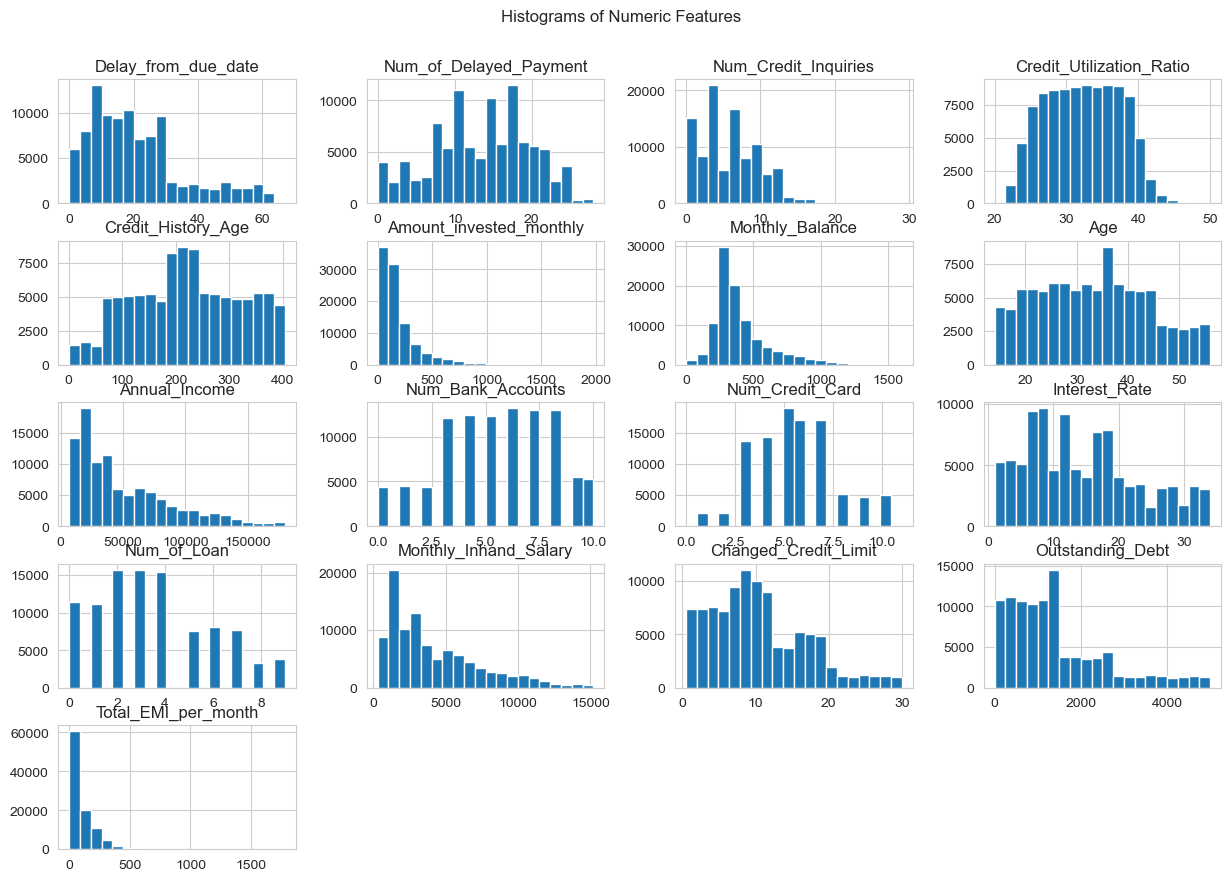

In [27]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", y=0.95)
plt.show()

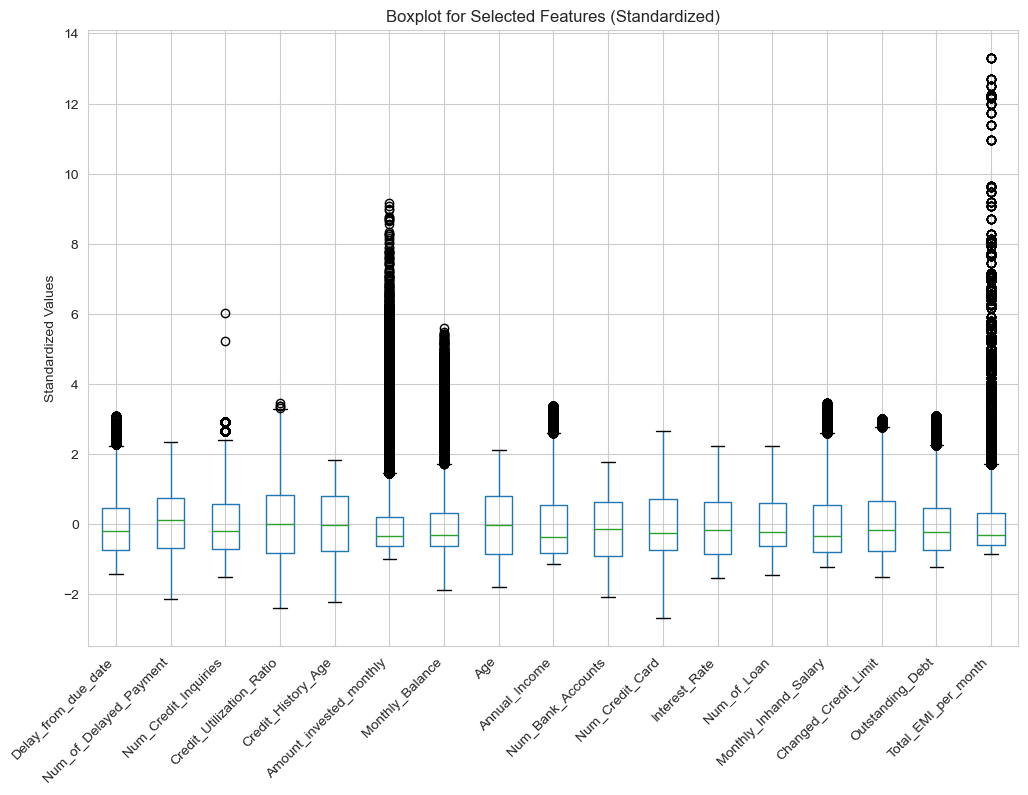

In [28]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['number']).columns
# Standardize the selected features
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Create a boxplot for standardized features
plt.figure(figsize=(12, 8))
df_standardized.boxplot()
plt.title("Boxplot for Selected Features (Standardized)")
plt.ylabel("Standardized Values")
plt.xticks(rotation=45, ha="right")
plt.show()

Feature: Delay_from_due_date
Number of outliers: 4002
Percentage of outliers: 4.00%


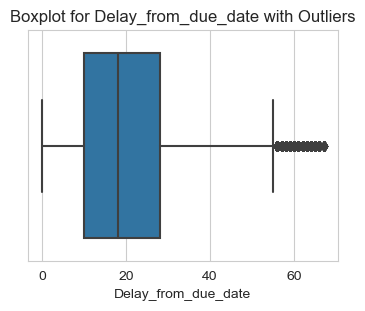

Feature: Num_Credit_Inquiries
Number of outliers: 767
Percentage of outliers: 0.77%


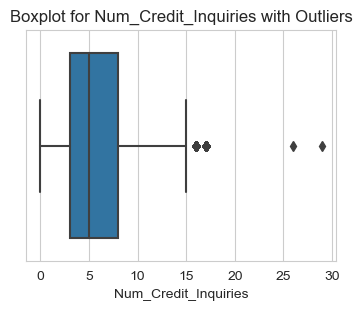

Feature: Credit_Utilization_Ratio
Number of outliers: 4
Percentage of outliers: 0.00%


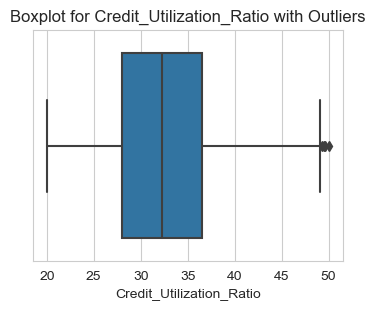

Feature: Amount_invested_monthly
Number of outliers: 8199
Percentage of outliers: 8.20%


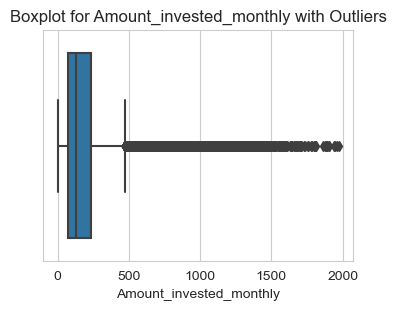

Feature: Monthly_Balance
Number of outliers: 7646
Percentage of outliers: 7.65%


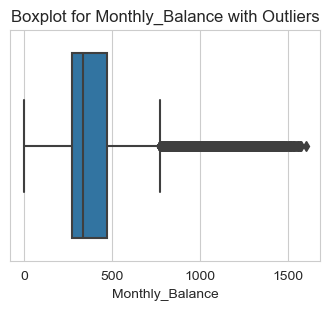

Feature: Annual_Income
Number of outliers: 2000
Percentage of outliers: 2.00%


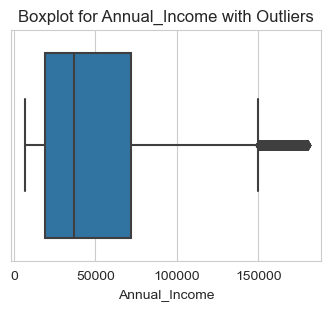

Feature: Monthly_Inhand_Salary
Number of outliers: 2016
Percentage of outliers: 2.02%


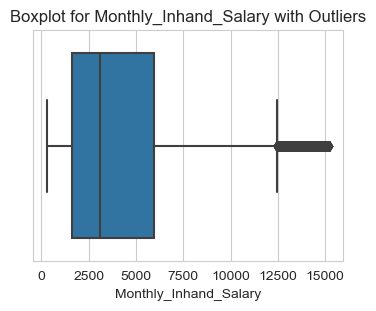

Feature: Changed_Credit_Limit
Number of outliers: 1096
Percentage of outliers: 1.10%


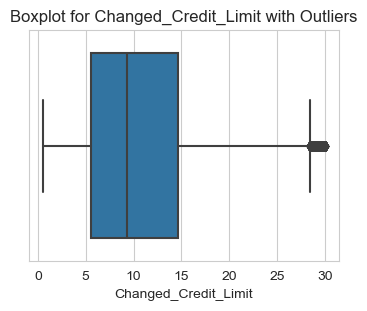

Feature: Outstanding_Debt
Number of outliers: 5264
Percentage of outliers: 5.27%


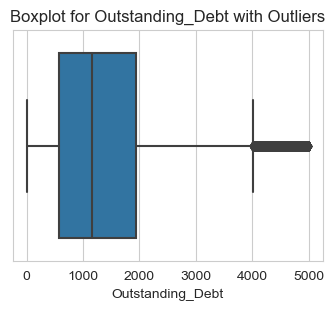

Feature: Total_EMI_per_month
Number of outliers: 5048
Percentage of outliers: 5.05%


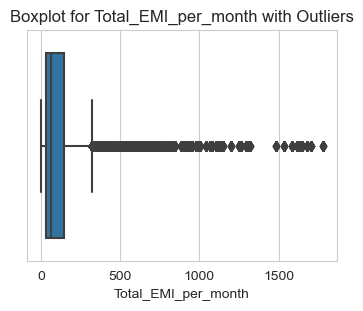

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features with outliers
features_with_outliers = ["Delay_from_due_date", "Num_Credit_Inquiries",
                          "Credit_Utilization_Ratio","Amount_invested_monthly", "Monthly_Balance",
                         "Annual_Income", "Monthly_Inhand_Salary","Changed_Credit_Limit","Outstanding_Debt",
                         "Total_EMI_per_month"]

for feature in features_with_outliers:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(df)) * 100

    # Print information about outliers
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%")

    # Create a boxplot with adjusted whiskers to visualize outliers
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[feature], showfliers=True)
    plt.title(f"Boxplot for {feature} with Outliers")
    plt.xlabel(feature)
    plt.show()



In [30]:
df2 = df.copy()

In [31]:
df = df[df["Num_Credit_Inquiries"] < 15] #dropping the outliers which has low percentage (below %1)

In [32]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df["Credit_Utilization_Ratio"].quantile(0.25)
Q3 = df["Credit_Utilization_Ratio"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

print(upper_bound)



49.166867572486076


In [33]:
df = df[df["Credit_Utilization_Ratio"] < 49.166867572486076]

In [34]:
df.shape

(98353, 22)

<AxesSubplot:>

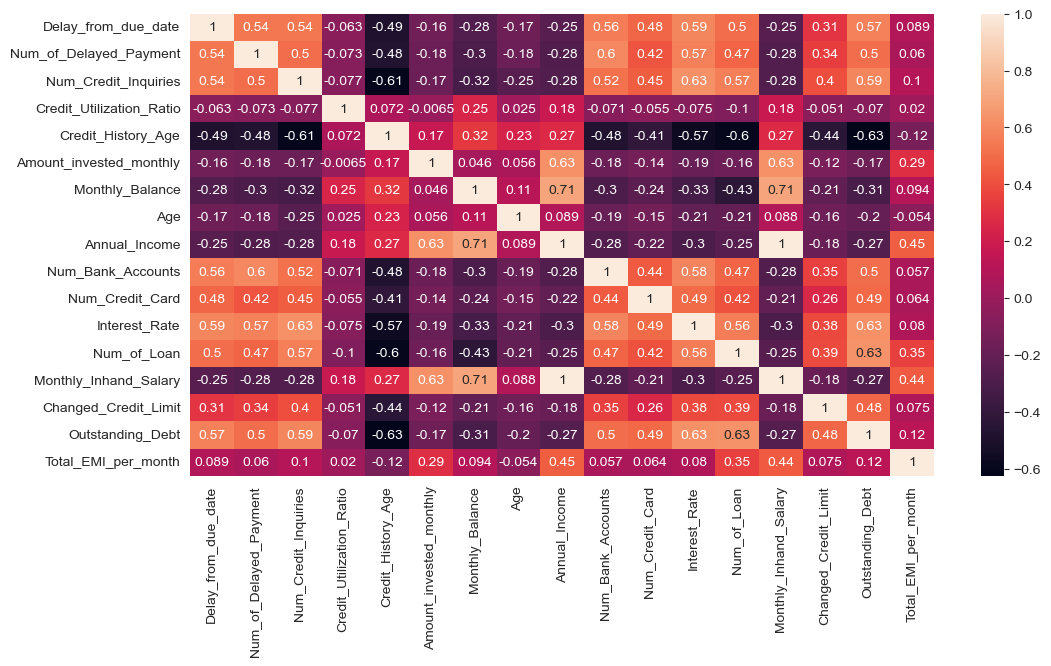

In [35]:
numeric_columns = df.select_dtypes(include=['number']).columns

sns.heatmap(df[numeric_columns].corr(), annot = True)


In [36]:
df.drop("Annual_Income", axis=1, inplace= True) # drooping multicallinear column

In [37]:
df.head().T

,0,1,2,3,4
Delay_from_due_date,3.000,3.000,3.000,5.000,6.000
Num_of_Delayed_Payment,7.000,7.000,7.000,4.000,4.000
Num_Credit_Inquiries,4.000,4.000,4.000,4.000,4.000
Credit_Utilization_Ratio,26.823,31.945,28.609,31.378,24.797
Credit_History_Age,265.000,265.000,267.000,268.000,269.000
Payment_of_Min_Amount,No,No,No,No,No
Amount_invested_monthly,80.415,118.280,81.700,199.458,41.420
Monthly_Balance,312.494,284.629,331.210,223.451,341.489
Credit_Score,Good,Good,Good,Good,Good
Credit_Mix,Good,Good,Good,Good,Good


ENCODING

In [38]:
dummies = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount') #drop_first = True
df = pd.concat([df, dummies], axis=1)
df = df.drop('Payment_of_Min_Amount', axis=1)
# nominal data converted to one hot encoded data by using pandas get_dummies method

In [39]:
df.head().T

,0,1,2,3,4
Delay_from_due_date,3.000,3.000,3.000,5.000,6.000
Num_of_Delayed_Payment,7.000,7.000,7.000,4.000,4.000
Num_Credit_Inquiries,4.000,4.000,4.000,4.000,4.000
Credit_Utilization_Ratio,26.823,31.945,28.609,31.378,24.797
Credit_History_Age,265.000,265.000,267.000,268.000,269.000
Amount_invested_monthly,80.415,118.280,81.700,199.458,41.420
Monthly_Balance,312.494,284.629,331.210,223.451,341.489
Credit_Score,Good,Good,Good,Good,Good
Credit_Mix,Good,Good,Good,Good,Good
Age,23.000,23.000,23.000,23.000,23.000


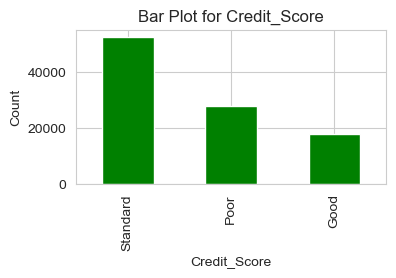

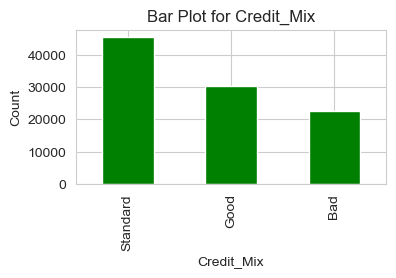

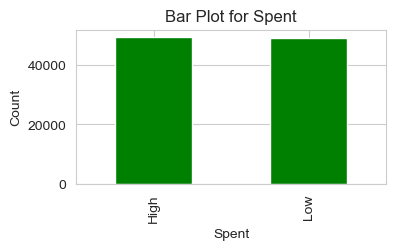

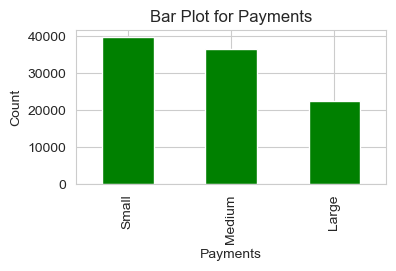

In [40]:
#visualize all categorical columns to see the variables and their distribution
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar plots for all categorical features
for column in categorical_columns:
    plt.figure(figsize=(4,2))
    df[column].value_counts().plot(kind='bar', color='green')
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [41]:
# categorical_columns = "Credit_Mix", "Spent", "Payments" > for ordinal encoding(there is a hierarchy bewtween variables)

from sklearn.preprocessing import OrdinalEncoder

features_and_categories = {
    'Credit_Mix': ['Bad','Standard', 'Good'],
    'Spent': ['Low', 'High'],
    'Payments': ['Small', 'Medium', 'Large']}

for feature, categories in features_and_categories.items():
    encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
    df[feature] = encoder.fit_transform(df[[feature]])

In [42]:
df.sample(10).T

,68705,73503,65637,80430,33800,28695,44150,17789,50369,34543
Delay_from_due_date,21.000,10.000,5.000,23.000,29.000,31.000,16.000,28.000,12.000,14.000
Num_of_Delayed_Payment,3.000,10.000,18.000,20.000,23.000,22.000,12.000,8.000,9.000,14.000
Num_Credit_Inquiries,1.000,1.000,7.000,6.000,10.000,11.000,7.000,6.000,0.000,9.000
Credit_Utilization_Ratio,39.711,22.374,34.861,35.954,28.202,34.059,38.307,28.932,25.942,39.529
Credit_History_Age,237.000,365.000,334.000,327.000,97.000,45.000,181.000,102.000,257.000,348.000
Amount_invested_monthly,170.073,44.084,97.714,150.648,43.126,71.235,46.285,651.511,100.877,439.116
Monthly_Balance,718.360,285.000,416.016,280.659,259.967,370.464,483.536,202.626,375.511,622.269
Credit_Score,Standard,Good,Good,Standard,Poor,Poor,Poor,Poor,Standard,Poor
Credit_Mix,2.000,2.000,1.000,1.000,0.000,0.000,1.000,1.000,2.000,1.000
Age,46.000,35.000,17.000,36.000,30.000,29.000,45.000,39.000,43.000,15.000


## Data Preprocessing

In [43]:
X = df.drop('Credit_Score', axis=1).values
y = df['Credit_Score'].values

In [44]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded, num_classes=3)

# one hot enocded target feature works better for ANN. Using keras library's to_categorical method makes compatible shape to be processed in Neural Network

In [45]:
from sklearn.model_selection import train_test_split


seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=seed)
# Stratify = y used to balance unbalanced data

A side note for encoding:

For ordinal data, we can either choose to use LabelEncoder or OrdinalEncoder. For nominal data, we can use get_dummies function from pandas or to_categorical from keras library. There is a slight difference in between explained as:

*pd.get_dummies:

This function is part of the pandas library and is commonly used to create dummy variables for categorical data.
It returns a DataFrame with binary columns for each category.
It is more suitable for handling categorical columns in a pandas DataFrame.
Example:


*to_categorical:

This function is part of the Keras utilities and is often used for one-hot encoding target variables in neural network models.
It converts a class vector to a binary class matrix and returns a NumPy array or a Keras tensor.
While it can be used for one-hot encoding, it is typically used for target variables, not independent features.

As a result, for inordered target variable, keras librariy offers more accurate encoding. For independent features we would still choose from pandas library according to nature of the data.

To be able to use to_categorical function, we should convert our categorical data to numeric data by using LabelEncoder.

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler =  MinMaxScaler() #RobustScaler

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, AUC, F1Score

In [49]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(
  from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='auto',
    name='categorical_crossentropy')

In [50]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [51]:
input_shape = X_train.shape[1]
input_shape


22

In [58]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(22,)))


    # Tune the dropout rate in the first Dropout layer
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout))

    # Add two more dense layers
    for i in range(3):
        # Tune the number of units in each dense layer
        hp_units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        model.add(Dense(units=hp_units, activation='relu'))
        
        #Tune the dropout rate in each Dropout layer
        hp_dropout = hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)
        model.add(Dropout(rate=hp_dropout))

    model.add(Dense(units=3, activation='softmax'))

    # Compile the model with categorical crossentropy loss for a multiclass classification problem
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC(name='auc')])

    return model

Dropout is typically used to prevent overfitting, and it's often applied after dense layers.

Here are a few considerations:

Input Layer: It's generally not common to use dropout directly after the input layer. Dropout is more commonly used after the first few dense layers.

Hidden Layers: Adding dropout after hidden layers is a good practice to prevent overfitting. I can apply dropout after each dense layer.

Output Layer: It's less common to use dropout directly before the output layer, especially in cases where you have a small number of classes. For the output layer, you often rely on the regularization provided by dropout in the preceding layers.

Number of Hidden Layers: The number of hidden layers is a hyperparameter that you can tune. In your current setup, I have 4 dense layers. I can experiment with fewer or more layers based on the complexity of your data. Too many layers might lead to overfitting.

In [60]:
my_dir = (r'C:\Users\azra_\OneDrive\Desktop\DL\Assignment')

In [61]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    executions_per_trial=1,
    directory='my_dir',
    project_name='Assignment-ANN'
)

In [62]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 06m 39s]
val_accuracy: 0.7032179236412048

Best val_accuracy So Far: 0.7036754488945007
Total elapsed time: 00h 22m 32s


In [63]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print information about the best hyperparameters
if best_hps is not None:
    print("Best Hyperparameters:")
    print(best_hps.values)
else:
    print("No completed trials or no improvement in objective.")

Best Hyperparameters:
{'units': 320, 'dropout': 0.4, 'units_0': 384, 'dropout_0': 0.2, 'units_1': 96, 'dropout_1': 0.30000000000000004, 'units_2': 352, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0001}


we need to decide
*   number of hidden layers
*  number of neurons in each hidden layer
*  correct activation functions(last one is defo softmax, reLu is generally preferred for hidden layers)
*  which optimizer to use( adam is generally quite relevant)
*   Validation size, epochs number, batch size
*   Regularization parameters( drop out, early stopping)
*   Batch normalization

Also, we need to choose correct loss function according to encoding type used on target variable:
* without one-hot encode labels  ==> sparse_categorical_crossentropy
* one-hot encode labels ==>  categorical_crossentropy








In [64]:

from tensorflow.keras.layers import BatchNormalization

tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(units=320, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(units=384, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=96, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=352, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=3, activation="softmax"))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, 
              loss="categorical_crossentropy",
              metrics=[CategoricalAccuracy(), Precision(), Recall(), F1Score()])

In [65]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train is one-hot encoded
class_labels = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(class_labels), y = class_labels)

# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))


In [66]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

In [67]:
history = model.fit( x=X_train, y=y_train, class_weight=class_weight_dict, validation_split=0.1, batch_size=32, epochs=500, callbacks = [early_stop], verbose=1)

Epoch 1/500
2213/2213 [==============================] - 44s 16ms/step - loss: 1.0329 - categorical_accuracy: 0.5466 - precision_1: 0.5642 - recall_1: 0.4968 - f1_score: 0.5419 - val_loss: 0.8278 - val_categorical_accuracy: 0.6616 - val_precision_1: 0.6684 - val_recall_1: 0.6419 - val_f1_score: 0.6536
Epoch 2/500
2213/2213 [==============================] - 28s 13ms/step - loss: 0.8739 - categorical_accuracy: 0.6060 - precision_1: 0.6277 - recall_1: 0.5509 - f1_score: 0.5999 - val_loss: 0.7933 - val_categorical_accuracy: 0.6696 - val_precision_1: 0.6830 - val_recall_1: 0.6393 - val_f1_score: 0.6597
Epoch 3/500
2213/2213 [==============================] - 27s 12ms/step - loss: 0.8103 - categorical_accuracy: 0.6322 - precision_1: 0.6546 - recall_1: 0.5755 - f1_score: 0.6258 - val_loss: 0.7684 - val_categorical_accuracy: 0.6686 - val_precision_1: 0.6919 - val_recall_1: 0.6315 - val_f1_score: 0.6610
Epoch 4/500
2213/2213 [==============================] - 28s 13ms/step - loss: 0.7759 - cat

2213/2213 [==============================] - 23s 10ms/step - loss: 0.6922 - categorical_accuracy: 0.6790 - precision_1: 0.6997 - recall_1: 0.6416 - f1_score: 0.6734 - val_loss: 0.7313 - val_categorical_accuracy: 0.6852 - val_precision_1: 0.7052 - val_recall_1: 0.6474 - val_f1_score: 0.6798
Epoch 29/500
2213/2213 [==============================] - 21s 9ms/step - loss: 0.6902 - categorical_accuracy: 0.6807 - precision_1: 0.7020 - recall_1: 0.6438 - f1_score: 0.6750 - val_loss: 0.7327 - val_categorical_accuracy: 0.6775 - val_precision_1: 0.6906 - val_recall_1: 0.6598 - val_f1_score: 0.6736
Epoch 30/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.6871 - categorical_accuracy: 0.6812 - precision_1: 0.7021 - recall_1: 0.6424 - f1_score: 0.6756 - val_loss: 0.7266 - val_categorical_accuracy: 0.6921 - val_precision_1: 0.7182 - val_recall_1: 0.6448 - val_f1_score: 0.6842
Epoch 31/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6847 - categorical_acc

2213/2213 [==============================] - 17s 8ms/step - loss: 0.6616 - categorical_accuracy: 0.6883 - precision_1: 0.7114 - recall_1: 0.6511 - f1_score: 0.6832 - val_loss: 0.7112 - val_categorical_accuracy: 0.6940 - val_precision_1: 0.7202 - val_recall_1: 0.6480 - val_f1_score: 0.6888
Epoch 56/500
2213/2213 [==============================] - 17s 8ms/step - loss: 0.6627 - categorical_accuracy: 0.6881 - precision_1: 0.7118 - recall_1: 0.6504 - f1_score: 0.6829 - val_loss: 0.7049 - val_categorical_accuracy: 0.6913 - val_precision_1: 0.7131 - val_recall_1: 0.6585 - val_f1_score: 0.6871
Epoch 57/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6621 - categorical_accuracy: 0.6863 - precision_1: 0.7097 - recall_1: 0.6488 - f1_score: 0.6814 - val_loss: 0.7089 - val_categorical_accuracy: 0.6892 - val_precision_1: 0.7177 - val_recall_1: 0.6522 - val_f1_score: 0.6855
Epoch 58/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6595 - categorical_accu

2213/2213 [==============================] - 18s 8ms/step - loss: 0.6408 - categorical_accuracy: 0.6927 - precision_1: 0.7161 - recall_1: 0.6562 - f1_score: 0.6886 - val_loss: 0.6901 - val_categorical_accuracy: 0.6989 - val_precision_1: 0.7229 - val_recall_1: 0.6611 - val_f1_score: 0.6956
Epoch 83/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6403 - categorical_accuracy: 0.6929 - precision_1: 0.7177 - recall_1: 0.6571 - f1_score: 0.6886 - val_loss: 0.6839 - val_categorical_accuracy: 0.7000 - val_precision_1: 0.7316 - val_recall_1: 0.6598 - val_f1_score: 0.6957
Epoch 84/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.6380 - categorical_accuracy: 0.6932 - precision_1: 0.7176 - recall_1: 0.6558 - f1_score: 0.6890 - val_loss: 0.6894 - val_categorical_accuracy: 0.6975 - val_precision_1: 0.7254 - val_recall_1: 0.6578 - val_f1_score: 0.6941
Epoch 85/500
2213/2213 [==============================] - 17s 8ms/step - loss: 0.6371 - categorical_acc

2213/2213 [==============================] - 19s 8ms/step - loss: 0.6194 - categorical_accuracy: 0.6986 - precision_1: 0.7232 - recall_1: 0.6643 - f1_score: 0.6951 - val_loss: 0.6684 - val_categorical_accuracy: 0.7152 - val_precision_1: 0.7368 - val_recall_1: 0.6749 - val_f1_score: 0.7114
Epoch 110/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6211 - categorical_accuracy: 0.6984 - precision_1: 0.7215 - recall_1: 0.6626 - f1_score: 0.6947 - val_loss: 0.6645 - val_categorical_accuracy: 0.7137 - val_precision_1: 0.7389 - val_recall_1: 0.6772 - val_f1_score: 0.7101
Epoch 111/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6190 - categorical_accuracy: 0.6989 - precision_1: 0.7230 - recall_1: 0.6651 - f1_score: 0.6955 - val_loss: 0.6742 - val_categorical_accuracy: 0.7125 - val_precision_1: 0.7332 - val_recall_1: 0.6749 - val_f1_score: 0.7091
Epoch 112/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6228 - categorical_a

Epoch 136/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6079 - categorical_accuracy: 0.7053 - precision_1: 0.7259 - recall_1: 0.6708 - f1_score: 0.7021 - val_loss: 0.6566 - val_categorical_accuracy: 0.7217 - val_precision_1: 0.7408 - val_recall_1: 0.6895 - val_f1_score: 0.7183
Epoch 137/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6070 - categorical_accuracy: 0.7048 - precision_1: 0.7274 - recall_1: 0.6708 - f1_score: 0.7018 - val_loss: 0.6629 - val_categorical_accuracy: 0.7134 - val_precision_1: 0.7309 - val_recall_1: 0.6791 - val_f1_score: 0.7112
Epoch 138/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.6041 - categorical_accuracy: 0.7046 - precision_1: 0.7266 - recall_1: 0.6724 - f1_score: 0.7017 - val_loss: 0.6589 - val_categorical_accuracy: 0.7203 - val_precision_1: 0.7431 - val_recall_1: 0.6823 - val_f1_score: 0.7168
Epoch 139/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.6051 -

Epoch 163/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5956 - categorical_accuracy: 0.7094 - precision_1: 0.7300 - recall_1: 0.6771 - f1_score: 0.7067 - val_loss: 0.6447 - val_categorical_accuracy: 0.7233 - val_precision_1: 0.7440 - val_recall_1: 0.6932 - val_f1_score: 0.7210
Epoch 164/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5952 - categorical_accuracy: 0.7078 - precision_1: 0.7293 - recall_1: 0.6767 - f1_score: 0.7053 - val_loss: 0.6493 - val_categorical_accuracy: 0.7225 - val_precision_1: 0.7406 - val_recall_1: 0.6880 - val_f1_score: 0.7202
Epoch 165/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5960 - categorical_accuracy: 0.7097 - precision_1: 0.7312 - recall_1: 0.6783 - f1_score: 0.7068 - val_loss: 0.6349 - val_categorical_accuracy: 0.7308 - val_precision_1: 0.7496 - val_recall_1: 0.6997 - val_f1_score: 0.7283
Epoch 166/500
2213/2213 [==============================] - 19s 8ms/step - loss: 0.5944 -

Epoch 190/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.5848 - categorical_accuracy: 0.7146 - precision_1: 0.7339 - recall_1: 0.6838 - f1_score: 0.7121 - val_loss: 0.6255 - val_categorical_accuracy: 0.7272 - val_precision_1: 0.7476 - val_recall_1: 0.7025 - val_f1_score: 0.7245
Epoch 191/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5832 - categorical_accuracy: 0.7126 - precision_1: 0.7321 - recall_1: 0.6826 - f1_score: 0.7102 - val_loss: 0.6329 - val_categorical_accuracy: 0.7288 - val_precision_1: 0.7471 - val_recall_1: 0.7033 - val_f1_score: 0.7264
Epoch 192/500
2213/2213 [==============================] - 21s 9ms/step - loss: 0.5830 - categorical_accuracy: 0.7135 - precision_1: 0.7331 - recall_1: 0.6841 - f1_score: 0.7111 - val_loss: 0.6249 - val_categorical_accuracy: 0.7311 - val_precision_1: 0.7522 - val_recall_1: 0.7014 - val_f1_score: 0.7286
Epoch 193/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5839 

Epoch 217/500
2213/2213 [==============================] - 23s 11ms/step - loss: 0.5774 - categorical_accuracy: 0.7172 - precision_1: 0.7366 - recall_1: 0.6871 - f1_score: 0.7151 - val_loss: 0.6308 - val_categorical_accuracy: 0.7266 - val_precision_1: 0.7446 - val_recall_1: 0.6993 - val_f1_score: 0.7254
Epoch 218/500
2213/2213 [==============================] - 26s 12ms/step - loss: 0.5746 - categorical_accuracy: 0.7161 - precision_1: 0.7359 - recall_1: 0.6877 - f1_score: 0.7140 - val_loss: 0.6202 - val_categorical_accuracy: 0.7322 - val_precision_1: 0.7516 - val_recall_1: 0.7061 - val_f1_score: 0.7306
Epoch 219/500
2213/2213 [==============================] - 24s 11ms/step - loss: 0.5754 - categorical_accuracy: 0.7181 - precision_1: 0.7372 - recall_1: 0.6889 - f1_score: 0.7159 - val_loss: 0.6231 - val_categorical_accuracy: 0.7321 - val_precision_1: 0.7470 - val_recall_1: 0.7078 - val_f1_score: 0.7305
Epoch 220/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.57

Epoch 244/500
2213/2213 [==============================] - 23s 11ms/step - loss: 0.5692 - categorical_accuracy: 0.7182 - precision_1: 0.7371 - recall_1: 0.6903 - f1_score: 0.7164 - val_loss: 0.6245 - val_categorical_accuracy: 0.7308 - val_precision_1: 0.7481 - val_recall_1: 0.7062 - val_f1_score: 0.7294
Epoch 245/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.5689 - categorical_accuracy: 0.7192 - precision_1: 0.7374 - recall_1: 0.6915 - f1_score: 0.7170 - val_loss: 0.6215 - val_categorical_accuracy: 0.7327 - val_precision_1: 0.7507 - val_recall_1: 0.7080 - val_f1_score: 0.7314
Epoch 246/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.5720 - categorical_accuracy: 0.7192 - precision_1: 0.7389 - recall_1: 0.6905 - f1_score: 0.7170 - val_loss: 0.6159 - val_categorical_accuracy: 0.7330 - val_precision_1: 0.7532 - val_recall_1: 0.7101 - val_f1_score: 0.7316
Epoch 247/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.57

Epoch 271/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5635 - categorical_accuracy: 0.7212 - precision_1: 0.7383 - recall_1: 0.6933 - f1_score: 0.7194 - val_loss: 0.6093 - val_categorical_accuracy: 0.7397 - val_precision_1: 0.7559 - val_recall_1: 0.7164 - val_f1_score: 0.7383
Epoch 272/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5661 - categorical_accuracy: 0.7216 - precision_1: 0.7401 - recall_1: 0.6952 - f1_score: 0.7196 - val_loss: 0.6110 - val_categorical_accuracy: 0.7359 - val_precision_1: 0.7529 - val_recall_1: 0.7101 - val_f1_score: 0.7343
Epoch 273/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5646 - categorical_accuracy: 0.7228 - precision_1: 0.7408 - recall_1: 0.6953 - f1_score: 0.7208 - val_loss: 0.6092 - val_categorical_accuracy: 0.7373 - val_precision_1: 0.7551 - val_recall_1: 0.7136 - val_f1_score: 0.7358
Epoch 274/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.5636 

Epoch 298/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.5584 - categorical_accuracy: 0.7251 - precision_1: 0.7427 - recall_1: 0.6985 - f1_score: 0.7231 - val_loss: 0.6087 - val_categorical_accuracy: 0.7362 - val_precision_1: 0.7534 - val_recall_1: 0.7139 - val_f1_score: 0.7351
Epoch 299/500
2213/2213 [==============================] - 21s 9ms/step - loss: 0.5601 - categorical_accuracy: 0.7240 - precision_1: 0.7408 - recall_1: 0.6978 - f1_score: 0.7222 - val_loss: 0.6028 - val_categorical_accuracy: 0.7383 - val_precision_1: 0.7561 - val_recall_1: 0.7147 - val_f1_score: 0.7373
Epoch 300/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.5556 - categorical_accuracy: 0.7245 - precision_1: 0.7421 - recall_1: 0.6994 - f1_score: 0.7225 - val_loss: 0.6055 - val_categorical_accuracy: 0.7405 - val_precision_1: 0.7548 - val_recall_1: 0.7178 - val_f1_score: 0.7386
Epoch 301/500
2213/2213 [==============================] - 23s 10ms/step - loss: 0.558

Epoch 325/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5578 - categorical_accuracy: 0.7228 - precision_1: 0.7402 - recall_1: 0.6978 - f1_score: 0.7211 - val_loss: 0.6013 - val_categorical_accuracy: 0.7420 - val_precision_1: 0.7586 - val_recall_1: 0.7194 - val_f1_score: 0.7399
Epoch 326/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.5569 - categorical_accuracy: 0.7265 - precision_1: 0.7425 - recall_1: 0.6996 - f1_score: 0.7248 - val_loss: 0.6058 - val_categorical_accuracy: 0.7396 - val_precision_1: 0.7551 - val_recall_1: 0.7221 - val_f1_score: 0.7383
Epoch 327/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5537 - categorical_accuracy: 0.7264 - precision_1: 0.7429 - recall_1: 0.7012 - f1_score: 0.7250 - val_loss: 0.5931 - val_categorical_accuracy: 0.7419 - val_precision_1: 0.7584 - val_recall_1: 0.7204 - val_f1_score: 0.7404
Epoch 328/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5550 

Epoch 352/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5574 - categorical_accuracy: 0.7263 - precision_1: 0.7438 - recall_1: 0.6996 - f1_score: 0.7246 - val_loss: 0.6029 - val_categorical_accuracy: 0.7401 - val_precision_1: 0.7539 - val_recall_1: 0.7167 - val_f1_score: 0.7394
Epoch 353/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5536 - categorical_accuracy: 0.7268 - precision_1: 0.7451 - recall_1: 0.7017 - f1_score: 0.7251 - val_loss: 0.5971 - val_categorical_accuracy: 0.7413 - val_precision_1: 0.7587 - val_recall_1: 0.7183 - val_f1_score: 0.7403
Epoch 354/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5517 - categorical_accuracy: 0.7285 - precision_1: 0.7445 - recall_1: 0.7019 - f1_score: 0.7271 - val_loss: 0.6109 - val_categorical_accuracy: 0.7377 - val_precision_1: 0.7508 - val_recall_1: 0.7162 - val_f1_score: 0.7369
Epoch 355/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5537 -

Epoch 379/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5502 - categorical_accuracy: 0.7296 - precision_1: 0.7451 - recall_1: 0.7038 - f1_score: 0.7280 - val_loss: 0.5950 - val_categorical_accuracy: 0.7423 - val_precision_1: 0.7577 - val_recall_1: 0.7204 - val_f1_score: 0.7414
Epoch 380/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5476 - categorical_accuracy: 0.7299 - precision_1: 0.7464 - recall_1: 0.7056 - f1_score: 0.7283 - val_loss: 0.5920 - val_categorical_accuracy: 0.7472 - val_precision_1: 0.7610 - val_recall_1: 0.7241 - val_f1_score: 0.7464
Epoch 381/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5505 - categorical_accuracy: 0.7308 - precision_1: 0.7463 - recall_1: 0.7049 - f1_score: 0.7291 - val_loss: 0.5969 - val_categorical_accuracy: 0.7469 - val_precision_1: 0.7596 - val_recall_1: 0.7211 - val_f1_score: 0.7461
Epoch 382/500
2213/2213 [==============================] - 18s 8ms/step - loss: 0.5454 -

Epoch 406/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5449 - categorical_accuracy: 0.7318 - precision_1: 0.7475 - recall_1: 0.7077 - f1_score: 0.7303 - val_loss: 0.5884 - val_categorical_accuracy: 0.7510 - val_precision_1: 0.7625 - val_recall_1: 0.7270 - val_f1_score: 0.7502
Epoch 407/500
2213/2213 [==============================] - 22s 10ms/step - loss: 0.5464 - categorical_accuracy: 0.7326 - precision_1: 0.7484 - recall_1: 0.7077 - f1_score: 0.7311 - val_loss: 0.5907 - val_categorical_accuracy: 0.7476 - val_precision_1: 0.7632 - val_recall_1: 0.7223 - val_f1_score: 0.7471
Epoch 408/500
2213/2213 [==============================] - 21s 10ms/step - loss: 0.5461 - categorical_accuracy: 0.7321 - precision_1: 0.7483 - recall_1: 0.7071 - f1_score: 0.7304 - val_loss: 0.5900 - val_categorical_accuracy: 0.7491 - val_precision_1: 0.7621 - val_recall_1: 0.7268 - val_f1_score: 0.7484
Epoch 409/500
2213/2213 [==============================] - 21s 10ms/step - loss: 0.544

Epoch 433/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5451 - categorical_accuracy: 0.7305 - precision_1: 0.7466 - recall_1: 0.7070 - f1_score: 0.7290 - val_loss: 0.5924 - val_categorical_accuracy: 0.7491 - val_precision_1: 0.7618 - val_recall_1: 0.7282 - val_f1_score: 0.7484
Epoch 434/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5439 - categorical_accuracy: 0.7327 - precision_1: 0.7485 - recall_1: 0.7079 - f1_score: 0.7312 - val_loss: 0.5869 - val_categorical_accuracy: 0.7480 - val_precision_1: 0.7631 - val_recall_1: 0.7283 - val_f1_score: 0.7470
Epoch 435/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5409 - categorical_accuracy: 0.7332 - precision_1: 0.7493 - recall_1: 0.7099 - f1_score: 0.7315 - val_loss: 0.5877 - val_categorical_accuracy: 0.7524 - val_precision_1: 0.7642 - val_recall_1: 0.7284 - val_f1_score: 0.7520
Epoch 436/500
2213/2213 [==============================] - 19s 9ms/step - loss: 0.5404 -

Epoch 460/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5389 - categorical_accuracy: 0.7349 - precision_1: 0.7504 - recall_1: 0.7116 - f1_score: 0.7333 - val_loss: 0.5858 - val_categorical_accuracy: 0.7497 - val_precision_1: 0.7624 - val_recall_1: 0.7327 - val_f1_score: 0.7483
Epoch 461/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5378 - categorical_accuracy: 0.7355 - precision_1: 0.7504 - recall_1: 0.7119 - f1_score: 0.7339 - val_loss: 0.5873 - val_categorical_accuracy: 0.7522 - val_precision_1: 0.7637 - val_recall_1: 0.7301 - val_f1_score: 0.7515
Epoch 462/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5396 - categorical_accuracy: 0.7340 - precision_1: 0.7492 - recall_1: 0.7106 - f1_score: 0.7325 - val_loss: 0.5884 - val_categorical_accuracy: 0.7503 - val_precision_1: 0.7629 - val_recall_1: 0.7298 - val_f1_score: 0.7496
Epoch 463/500
2213/2213 [==============================] - 20s 9ms/step - loss: 0.5388 -

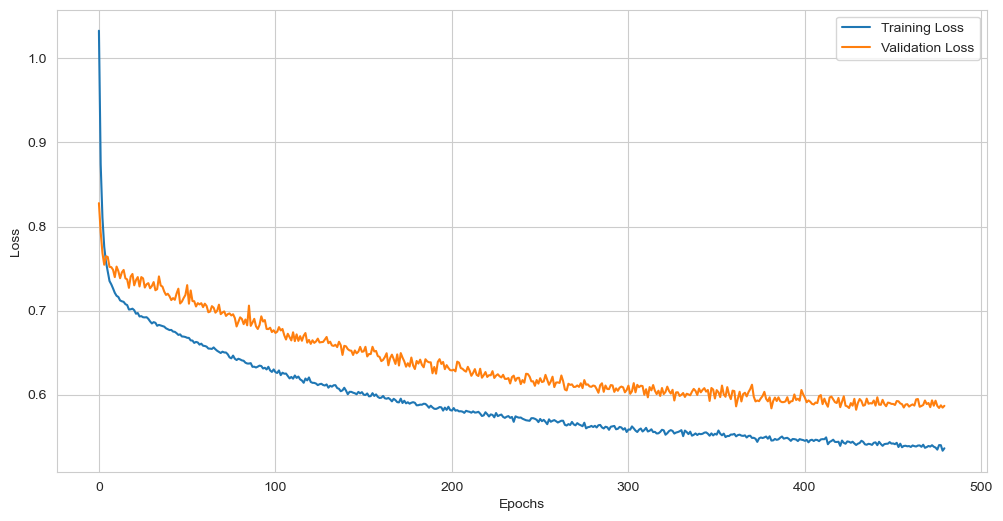

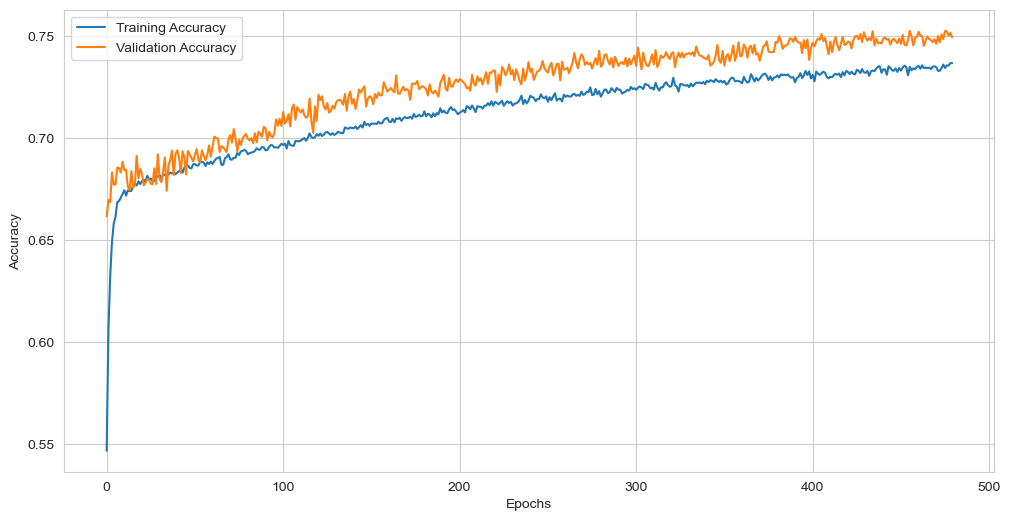

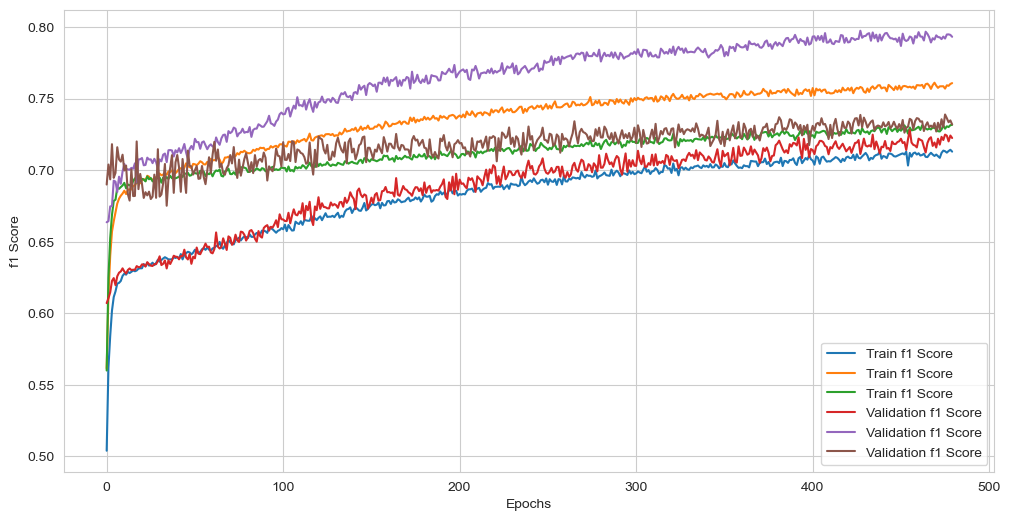

In [68]:
# Accessing training metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']
train_f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

# Plotting training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Plotting training and validation f1_score
plt.plot(train_f1_score, label='Train f1 Score')
plt.plot(val_f1_score, label='Validation f1 Score')
plt.xlabel('Epochs')
plt.ylabel('f1 Score')
plt.legend()
plt.show()


In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 320)               7360      
                                                                 
 batch_normalization (Batch  (None, 320)               1280      
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 384)               123264    
                                                                 
 batch_normalization_1 (Bat  (None, 384)               1536      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 384)              

In [70]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score'])


In [71]:
pd.DataFrame(model.history.history)

,loss,categorical_accuracy,precision_1,recall_1,f1_score,val_loss,val_categorical_accuracy,val_precision_1,val_recall_1,val_f1_score
0,1.033,0.547,0.564,0.497,"[0.503993, 0.5615845, 0.5600484]",0.828,0.662,0.668,0.642,"[0.60714287, 0.6636578, 0.690021]"
1,0.874,0.606,0.628,0.551,"[0.56206405, 0.6124811, 0.6250116]",0.793,0.670,0.683,0.639,"[0.6105425, 0.664422, 0.704]"
2,0.810,0.632,0.655,0.576,"[0.58423066, 0.64031607, 0.6527177]",0.768,0.669,0.692,0.631,"[0.61466944, 0.67475003, 0.69364977]"
3,0.776,0.649,0.672,0.596,"[0.601871, 0.65706813, 0.668736]",0.755,0.683,0.708,0.630,"[0.62265646, 0.67490274, 0.7182058]"
4,0.758,0.658,0.679,0.608,"[0.6113947, 0.66437334, 0.678562]",0.765,0.677,0.704,0.631,"[0.6246373, 0.6927374, 0.69468653]"
...,...,...,...,...,...,...,...,...,...,...
475,0.535,0.734,0.749,0.712,"[0.7132894, 0.7570642, 0.7290443]",0.587,0.753,0.766,0.732,"[0.7249227, 0.7920434, 0.7389614]"
476,0.540,0.736,0.751,0.712,"[0.7123227, 0.75936234, 0.73068416]",0.584,0.752,0.766,0.732,"[0.7241771, 0.7948617, 0.73637134]"
477,0.540,0.736,0.751,0.712,"[0.71343064, 0.7590005, 0.73022264]",0.587,0.750,0.763,0.733,"[0.72015774, 0.79494274, 0.7335767]"
478,0.533,0.737,0.752,0.714,"[0.71430385, 0.7603052, 0.73148245]",0.585,0.752,0.765,0.733,"[0.72425437, 0.7945968, 0.7348252]"


<AxesSubplot:>

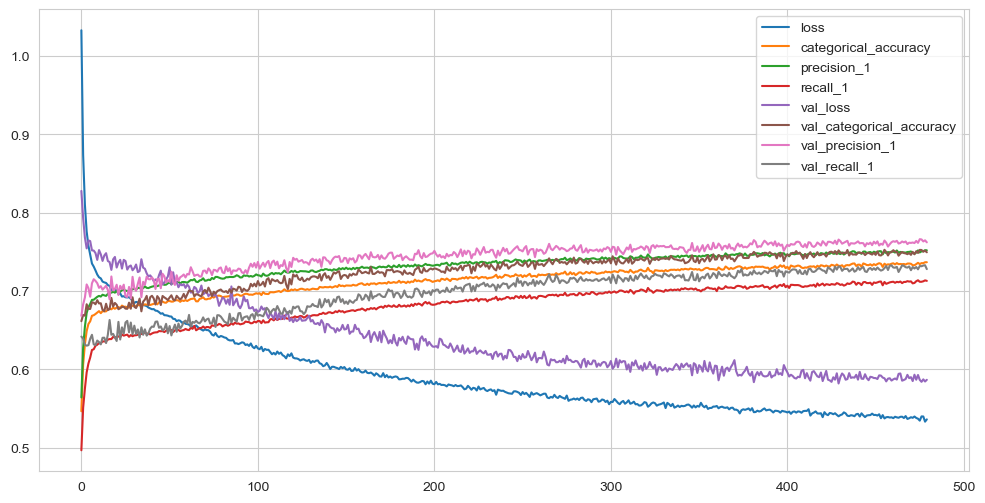

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
# Get predicted probabilities for each class
predicted_probabilities = model.predict(X_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Print the predicted labels
print(predicted_labels)

615/615 [==============================] - 3s 3ms/step
[2 2 2 ... 1 1 2]


In [74]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

615/615 [==============================] - 2s 3ms/step


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Assuming y_true is your true labels
y_true = y_test_labels

# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true, predicted_labels, average=None)
recall = recall_score(y_true, predicted_labels, average=None)
f1 = f1_score(y_true, predicted_labels, average=None)

# Print precision, recall, and F1 score for each class
for class_label, p, r, f in zip(range(len(precision)), precision, recall, f1):
    print(f'Class {class_label}: Precision={p:.4f}, Recall={r:.4f}, F1 Score={f:.4f}')

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_true, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_true, predicted_labels)
print('Classification Report:')
print(class_report)

Accuracy: 0.7439
Class 0: Precision=0.5998, Recall=0.8986, F1 Score=0.7194
Class 1: Precision=0.7110, Recall=0.8715, F1 Score=0.7831
Class 2: Precision=0.8769, Recall=0.6237, F1 Score=0.7289
Confusion Matrix:
[[3198   40  321]
 [ 119 4877  600]
 [2015 1942 6559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3559
           1       0.71      0.87      0.78      5596
           2       0.88      0.62      0.73     10516

    accuracy                           0.74     19671
   macro avg       0.73      0.80      0.74     19671
weighted avg       0.78      0.74      0.74     19671



In [76]:
# Get predicted probabilities for each class on the training set
train_predicted_probabilities = model.predict(X_train)

# Convert probabilities to class labels
train_predicted_labels = np.argmax(train_predicted_probabilities, axis=1)

# Assuming y_train is one-hot encoded, convert it to class labels
train_true_labels = np.argmax(y_train, axis=1)

# Calculate and print metrics on the training set
train_accuracy = accuracy_score(train_true_labels, train_predicted_labels)
print(f'Training Accuracy: {train_accuracy:.4f}')

train_precision = precision_score(train_true_labels, train_predicted_labels, average=None)
train_recall = recall_score(train_true_labels, train_predicted_labels, average=None)
train_f1 = f1_score(train_true_labels, train_predicted_labels, average=None)

print('Training Metrics:')
for class_label, p, r, f in zip(range(len(train_precision)), train_precision, train_recall, train_f1):
    print(f'Class {class_label}: Precision={p:.4f}, Recall={r:.4f}, F1 Score={f:.4f}')

# Calculate and print the confusion matrix on the training set
train_conf_matrix = confusion_matrix(train_true_labels, train_predicted_labels)
print('Training Confusion Matrix:')
print(train_conf_matrix)

# Print the classification report on the training set
train_class_report = classification_report(train_true_labels, train_predicted_labels)
print('Training Classification Report:')
print(train_class_report)

2459/2459 [==============================] - 7s 3ms/step
Training Accuracy: 0.7853
Training Metrics:
Class 0: Precision=0.6477, Recall=0.9664, F1 Score=0.7756
Class 1: Precision=0.7344, Recall=0.9262, F1 Score=0.8192
Class 2: Precision=0.9346, Recall=0.6491, F1 Score=0.7661
Training Confusion Matrix:
[[13757    46   432]
 [  176 20733  1477]
 [ 7307  7452 27302]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78     14235
           1       0.73      0.93      0.82     22386
           2       0.93      0.65      0.77     42061

    accuracy                           0.79     78682
   macro avg       0.77      0.85      0.79     78682
weighted avg       0.83      0.79      0.78     78682

